In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
data_display = pd.read_csv("dataset3_pd.csv")

data_display

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),y
0,53,208,87,36,44,0,21.9,97,-0.1
1,59,62,93,36,50,113,22.3,100,-0.1
2,60,61,93,36,56,152,22.8,100,-0.1
3,58,60,91,36,51,141,23.3,100,-0.1
4,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...
408,39,42,42,36,44,0,14.5,93,-0.1
409,39,42,42,36,44,0,13.9,99,-0.1
410,39,42,42,36,44,0,14.4,100,-0.1
411,39,42,42,36,44,0,14.6,98,-0.1


In [11]:
learning_rate = 0.0001
trainning_steps = 100000
display_step = 10000

w_pred = 0

In [12]:
data = np.loadtxt("dataset3_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:250, :8]
x_test = data[250:, :8]

y_train = data[:250, [-1]]
y_test = data[250:, [-1]]

w1 = tf.Variable(tf.random.uniform([8, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([8, 1], 0, 1))

bias = tf.Variable(random.random())

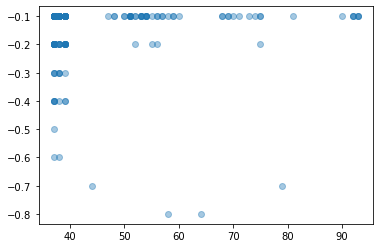

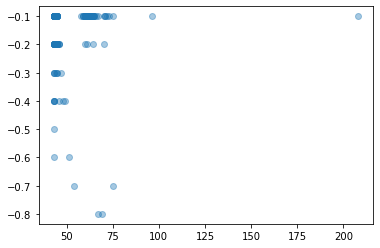

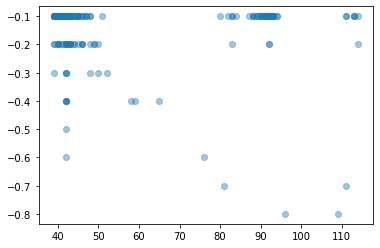

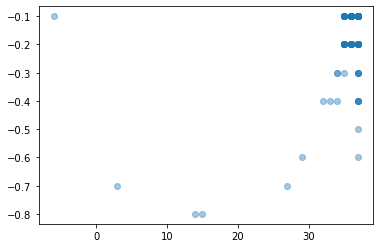

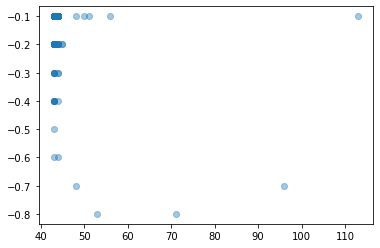

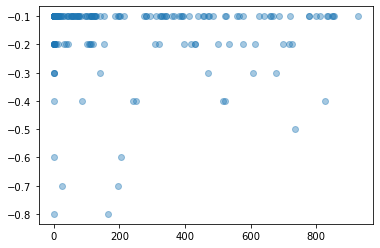

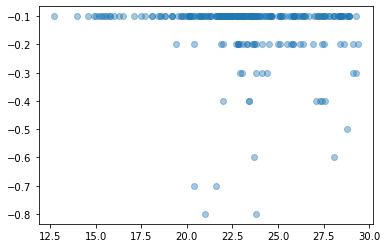

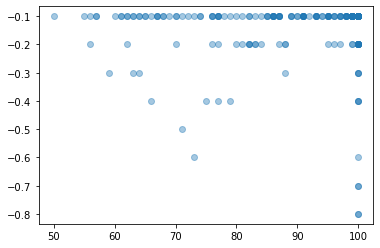

In [13]:
for i in range(8):
    plt.scatter(x_train[:, [i]], y_train, alpha=0.4)
    plt.show()

In [14]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

In [15]:
optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w1:', w1.numpy(), '\n', 'w2:', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w1_pred = w1.numpy()
        w2_pred = w2.numpy()

step: 10000 
 w1: [[-0.5215635 ]
 [-0.31285387]
 [-0.0383299 ]
 [-0.301447  ]
 [-0.2470214 ]
 [ 0.00866099]
 [-0.41764036]
 [ 0.20664793]] 
 w2: [[ 0.1811402 ]
 [ 0.29238665]
 [ 0.32018808]
 [ 0.18356584]
 [-0.37941274]
 [-0.06161131]
 [-0.41743433]
 [-0.4851904 ]] 
 bias: -0.0050007757 
 loss: 3519422.8 

step: 20000 
 w1: [[-0.04307163]
 [ 0.0014685 ]
 [-0.00787347]
 [-0.21218444]
 [ 0.00408379]
 [ 0.00072105]
 [-0.31587303]
 [ 0.05629725]] 
 w2: [[ 0.5095844 ]
 [ 0.44821164]
 [ 0.39718843]
 [ 0.25811306]
 [-0.23114032]
 [-0.03182581]
 [-0.32110715]
 [-0.5083452 ]] 
 bias: 0.09420695 
 loss: 14725.187 

step: 30000 
 w1: [[-5.0553591e-03]
 [-2.0600797e-03]
 [-4.3022498e-03]
 [-1.9965453e-02]
 [-5.5407902e-04]
 [-1.0296645e-05]
 [-4.5726858e-03]
 [ 1.8991774e-03]] 
 w2: [[ 0.5589685 ]
 [ 0.53564644]
 [ 0.45460638]
 [ 0.43605772]
 [-0.13657784]
 [ 0.00504517]
 [-0.06356701]
 [-0.4380132 ]] 
 bias: 0.23201194 
 loss: 4.934189 

step: 40000 
 w1: [[-3.4242764e-03]
 [-1.5852443e-03]
 [-2.

In [19]:
y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias

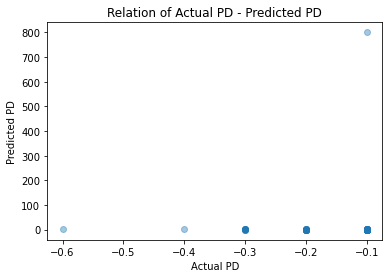

In [20]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [21]:
def rmse(x_test, y_test):
    y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

62.74239


In [ ]:
# 학습 중간에 loss가 더 낮은 학습 set이 있었다. -> 어떻게 해결하지?